# Домашнее задание 5. Классификация


## Задание 1 (1 балл)

Нарисуйте два вордклауда: для позитивных и негативных. Постарайтесь сделать их информативными: например, не отображайте "общеанглийские" стоп-слова. Возможно, какие-то еще слова оказались частотными и для позитивных, и для негативных, и их тоже можно убрать?

In [1]:
import pandas as pd
from google.colab import drive
# Доступ к гугл хранилищу
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/IMDB_Dataset.csv')

Mounted at /content/drive


In [2]:
import re

In [3]:
# Убираю ненужные символы из текста
def strip_text(text):
  regex_1 = r'\bbr\b'
  regex_2 = r"[\/<>]"
  text = re.sub(regex_1,'',text)
  text = re.sub(regex_2,'',text)
  return text

df['review'] = df['review'].apply(strip_text)

In [ ]:
print(df[:5])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.   The filming t...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Проходимся по всем отзывам, записываем в отдельные текстовые документы положительные и негативные

for row in range(len(df)):
  text = df.iloc[row, 0]
  if df.iloc[row, 1] == 'positive':
    with open('/content/drive/MyDrive/positive.txt', 'a') as pf:
      pf.write(text)
  else:
    with open('/content/drive/MyDrive/negative.txt', 'a') as nf:
      nf.write(text)

In [ ]:
from wordcloud import STOPWORDS

stop_words = set(STOPWORDS)
# Добавляю часто встречающиеся в обоих отзывах слова
stop_words.update(["movie", "films", "characters", "well", "end", "show", "will", "people", 'watch', 'know', 'thing', 'say', "first", "good", "think", "way", "made", 'make' ,"much", "story", 'movies', 'time', 'though', "film", "scene", "really", "one", "would", 'see', 'seen', 'get', 'even', 'also', 'character', "plot"])


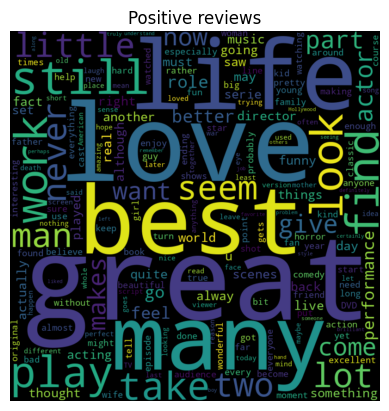

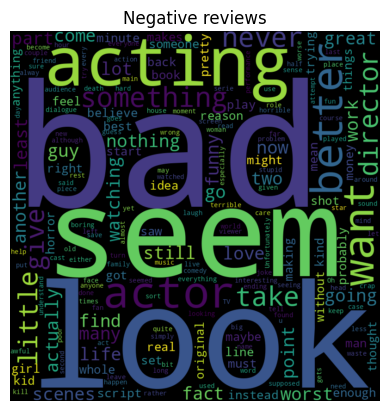

In [ ]:
# Читаем оба файла и создаем облака
with open('/content/drive/MyDrive/negative.txt', 'r') as file1:
  text_n = file1.read()
  wc_neg = WordCloud(stopwords=stop_words, background_color="black", width = 800, height = 800).generate(text_n)

with open('/content/drive/MyDrive/positive.txt', 'r') as pf:
  text_p = pf.read()
  wc_pos = WordCloud(stopwords=stop_words, background_color="black", width = 800, height = 800).generate(text_p)

# Выводим облака
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Positive reviews')
plt.show()

plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative reviews')
plt.axis("off")
plt.show()

## Задание 2 (1 балл)
Разбейте данные на обучающую и тестовую выборки и векторизуйте каким-либо способом, про который мы говорили на семинаре.


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# Делим данные на тренировочные и тестовые
data = df["review"]
y = df["sentiment"]

data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [7]:
# Тут я преобразую свой сет стоп-слов в список чтобы использовать в параметрах векторизатора
import nltk
from nltk.corpus import stopwords

more_words = ["movie", "films", "characters", "well", "end", "show", "will", "people", 'watch', 'know', 'thing', 'say', "first", "good", "think", "way", "made", 'make' ,"much", "story", 'movies', 'time', 'though', "film", "scene", "really", "one", "would", 'see', 'seen', 'get', 'even', 'also', 'character', "plot"]

nltk.download('stopwords')
custom_stops = set(stopwords.words('english') + more_words)
custom_stops = list(custom_stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
vectorizer = CountVectorizer(binary=True, max_features=10000, stop_words=custom_stops)

In [9]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

## Задание 3 (1 балл)

Обучите любой классификатор на обучающей выборке и замерьте качество на тестовой выборке. Вспомните, что такое accuracy, precision (точность), recall (полнота). Напишите функции, сравнивающие истинные метки с предсказанными и считающие метрики. Проверьте, что результат вашей реализации совпадает с метриками из sklearn.

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [12]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
# Здесь вылезает warning, оставила как есть, не знаю, как это решить, но и с ним все работает

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
classifier.predict(X_test)[:10]

array(['positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative'],
      dtype=object)

In [14]:
y_pred = classifier.predict(X_test)

Решение для нахождения NP FP и тд подсмотрено [здесь](https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal).

In [15]:
# y_pred - список предсказанных значений
# y_test  = список реальных значений
y_test = list(y_test)

# Функция для нахождения значений матрицы ошибок
def conf_matrix(pred, test):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
# Проходимся по списку предсказанных значений, сопоставляем с реальными
  for value in range(len(pred)):
    if pred[value] == test[value] == "positive":
      TP += 1
    elif pred[value] == "positive" and test[value] != pred[value]:
      FP += 1
    elif pred[value] == test[value] == "negative":
      TN += 1
    elif pred[value] == "negative" and test[value] != pred[value]:
      FN += 1
  return TP, FP, TN, FN

In [16]:
print(conf_matrix(y_pred, y_test))

(4333, 650, 4385, 632)


In [17]:
def accuracy(pred, test):
    TP, FP, TN, FN = conf_matrix(pred, test)
    acc = (TP + TN) / (TP + TN + FP + FN)
    return acc

In [18]:
# Cравниваем с sklearn
my_acc = accuracy(y_pred, y_test)
sklearn_acc = accuracy_score(y_test, y_pred)
print(my_acc)
print(sklearn_acc) # Совпадает!

0.8718
0.8718


In [19]:
def precision(pred, test):
    TP, FP, TN, FN = conf_matrix(pred, test)
    prec = TP / (TP + FP)
    return prec

In [20]:
# Сравниваем с sklearn
my_prec = precision(y_pred, y_test)
sklearn_prec = precision_score(y_test, y_pred, average="binary", pos_label="positive")
print(my_prec)
print(sklearn_prec) # Совпадает!

0.8695564920730484
0.8695564920730484


In [21]:
def recall(pred, test):
    TP, FP, TN, FN = conf_matrix(pred, test)
    recall_ = TP / (TP + FN)
    return recall_

In [22]:
# Сравниваем с sklearn
my_recall = recall(y_pred, y_test)
sklearn_recall = recall_score(y_test, y_pred, pos_label = "positive")
print(my_recall)
print(sklearn_recall) # Совпадает!

0.8727089627391742
0.8727089627391742


## Задание 4 (1 балл)
Объясните **своими** (не коллеги, поста в интернете или chatGPT) словами, как работают выбранные векторизатор и классификатор и что означает каждая из метрик: accuracy, recall, precision


*  **Count vectorizer -- переводит тексты в числовые значения для того, чтобы компьютер их понимал. Если распечатать результаты vec.transform(data_test).astype(int) то получим набор подобных штук (9999, 5573)	1, где первое число это номер документа (текста), второе индекс слова, последнее - кол-во его вхождений в этот текст.**
*   **Accuracy -- показывает, сколько правильных ответов программы из всего количества тестовых сэмплов.**
*   **Precision -- показывает, сколько сэмплов в пределах одного класса алгоритм разметил верно (то есть, есть, к приемру, все сэмплы, которые алгоритм разметил как positive. Тогда смотрим сколько из этого числа ответов, которые реально positive (TP) и делим на все размеченные positive).**
*   **Recall -- показывает долю правильно размеченных ответов одного класса от всего количества сэмплов этого класса в реальности. Tо есть true positive / true positive + false negative**


## Задание 5 (1 балл)

Используйте другой метод векторизации и тот же классификатор. Замерьте качество. Как оно изменилось?

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
another_vectorizer = TfidfVectorizer(stop_words=custom_stops)
X_tf_train = another_vectorizer.fit_transform(data_train)
X_tf_test = another_vectorizer.transform(data_test)

In [25]:
classifier.fit(X_tf_train, y_train)

LogisticRegression()

In [26]:
classifier.predict(X_tf_test)[:10]

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative'],
      dtype=object)

In [27]:
y_new_vec_pred = classifier.predict(X_tf_test)

In [28]:
print(accuracy(y_new_vec_pred, y_test))
print(precision(y_new_vec_pred, y_test))
print(recall(y_new_vec_pred, y_test)) # Как будто чуть лучше справляется, результаты немного повыше

0.8886
0.8800078942174857
0.898086606243706


## Задание 6 (1 балл)

Для обоих векторизаторов попробуйте использовать другой классификатор. Опишите своими словами, как работает новый классификатор.

Как изменилось качество с другой моделью?

In [29]:
from sklearn.tree import DecisionTreeClassifier

**Новый классификатор -- дерево решений. Модель выбирает характеристики, по которым выделять узлы дерева. Изначально есть один узел, затем на основании каких-то характеристик сэмплов модель создает новые узлы, по которым будет принимать решение потом. Эти узлы могут делиться дальше или остаться листьями. Можно регулировать глубину дерева/количество сэмплов для дальнейшего деления узла и прочие штуки с помощью параметров.**

In [30]:
another_clas = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
     )

another_clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [31]:
y_pred_tree = another_clas.predict(X_test)

In [32]:
print(accuracy(y_pred_tree, y_test))
print(precision(y_pred_tree, y_test))
print(recall(y_pred_tree, y_test))

0.7213
0.6824120603015076
0.8205438066465257


In [33]:
another_clas.fit(X_tf_train, y_train)
y_pred_tree_tf = another_clas.predict(X_tf_test)

In [34]:
print(accuracy(y_pred_tree_tf, y_test))
print(precision(y_pred_tree_tf, y_test))
print(recall(y_pred_tree_tf, y_test))

0.7294
0.6927145538304044
0.8177240684793555


## Задание 7 (1 балл)

Получилось 4 набора результатов. Сравните их. Что вы можете сказать? Как меняется качество?

**Наиболее высокие показатели у комбинации логистическая регрессия + данные, векторизованные по tf idf. С данными, векторизованными по CountVectorizer, результаты не сильно ниже.
Деревья справляются хуже с обоими векторизаторами, но, возможно, проблема в параметрах, я ставила их экспериментально.**

## Задание 8 (3 балла)

## Задание 8.1 (2 балла из 3)

У векторизаторов и классификаторов есть множество параметров. Переключать их руками, перезапускать ячейки и записывать результаты — не очень удобно. Лучше это автоматизировать:
1. Выберите несколько параметров и возможных значений. Напишите своими слвоами, за что отвечают эти значения.
2. Напишите перебор каждого значения каждого параметра, чтобы проверить все возможные сочетания
3. Обучайте векторизатор и классификатор с данным набором параметров на тренировочной выборке, затем замеряйте качество на тестовой. Если получается лучше, чем было — сохраняйте результат и параметры, с которыми он получился. (По какой метрике или набору метрик считать параметры "лучше", решите самостоятельно)

В итоге вы получите значения параметров для векторизатора и классификатора, которые ведут к наибольшему качеству. Выведите параметры и соответствующие метрики.

**Для СountVectorizer:**
* **n_gram_range (нижняя и верхняя граница n для n-грам), переберем комбинации значений от 1 до 2**
* **max_df - игнорировать термы, у которых частота выше (попробуем 0.5 - 0.6)**
* **min_df - игнорировать термы, у которых частота ниже (0.1-0.2)**

**Для дерева решений:**
* **max_depth -- макс глубина, то есть сколько уровней узлов будет. Поранжируемся по (3, 6)**
* **min_samples_split -- (2, 3) сколько сэмплов требуется, чтобы узел дальше ветвился.**
* **min samples_leaf -- (1, 2, 3) сколько сэмплов требуется, чтобы узел стал листом (не ветвился дальше).**

**Метрика -- recall**

**Изначально я хотела перебирать больше значений для параметров, но в колабе он не обрабатывает так долго и вылетает (ну или не в этом была проблема, не знаю). С меньшим разбросом по значениям код не вылетает.**


In [ ]:
# Беру первые 5000 текстов, чтобы супер долго не обрабатывалось
dt = df["review"][:5000]
Y = df["sentiment"][:5000]

# Делю на тренировочную и тестовые выборки
dt_train, dt_test, Y_train, Y_test = train_test_split(dt, Y, test_size=0.2, random_state=0)

In [ ]:
highest_result = 0
parameters = {
    "ngram_range": (),
    "max_df": float,
    "min_df": float,
    "max_depth": int,
    "min_samples_split": int,
    "min_samples_leaf": int
    }
# Перебор значений всех параметров
for dfmax in range(5, 7):
  dfmax /= 10
  for dfmin in range(1, 3):
    dfmin /= 10
    for n in range(1, 3):
      for i in range(1, 3):
        if n <= i:
          ngram = (n, i)
        else:
          pass
        adj_vectorizer = CountVectorizer(ngram_range=ngram, max_df=dfmax, min_df=dfmin)
        for depth in range(3, 6):
          for split in range (2, 4):
            for leaf in range(1, 4):
              adj_tree = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                min_samples_leaf=leaf,
                )
              # Реализация параметров в векторизации и классификаторе
              new_train_data = adj_vectorizer.fit_transform(dt_train)
              new_test_data = adj_vectorizer.transform(dt_test)
              adj_tree.fit(new_train_data, Y_train)
              pred_ytest = adj_tree.predict(new_test_data)
              # Рассчитать метрику recall
              result = recall_score(Y_test, pred_ytest, pos_label = "positive")
              # Если результат выше предыдущего -- сохранить score и параметры
              if result > highest_result:
                highest_result = result
                parameters.update(
                  [
                  ("ngram_range", ngram),
                  ("max_df", dfmax,),
                  ("min_df", dfmin),
                  ("max_depth", depth),
                  ("min_samples_split", split),
                  ("min_samples_leaf", leaf)
                    ]
                  )
              else:
                pass
print(highest_result)
print(parameters)

0.8336842105263158
{'ngram_range': (2, 2), 'max_df': 0.5, 'min_df': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
